In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# <font face="gotham" color="purple"> Order Book</font>

You should know that the **order book**  is a popular term if you are familiar with stocking trading.   

In the order book, the current highest **buy order** is called **bid**, the current lowest **sell order** is **ask**. The difference between them is the **spread**.

If you long a pair, your cost will be the _ask price_, if you short a pair, your cost will be the _bid price_.

<img src="order_book.jpg" width="600" class="center" align="center"/>

# <font face="gotham" color="purple"> ECN, DMA </font>

**Electronic Communications Networks** (**ECN**) operates as virtually centralized marketplaces, aggregating offers to trade and matching them against incoming trade requests. 

In contrast to the **dealer-client markets** (**DCM**), which were quote-driven, these platforms were generally order-driven. An order-driven market is a market in which executable prices are offered in advance of any requests to trade. 

# <font face="gotham" color="purple"> Pip Value Calculation </font>

A standard lot is the equivalent of $100,000$ units of the base currency in a forex trade.
$$
\underbrace{\text{EUR}}_{\text{Base Currency}}/\underbrace{\text{USD}}_{\text{Quote Currency}}
$$
Say the spot price (practically $0$ spread, some raw spread broker can provide this service) of $\text{EUR/USD}$ is 
$$
\text{EUR/USD} = 1.12345
$$
**One standard lot** costs  

In [2]:
a = 1.12345*100000; print(a)

112345.0


of which the unit is from quote currency i.e. $\text{USD}$. If the spot price increase one **pip** (10 pipettes), here is the new contract value

In [3]:
b = 1.12355*100000; print(b)

112355.0


Therefore one pip value of $\text{EUR/USD}$ is

In [4]:
b - a

10.0

which means one pip value of a standard lot is $10$ USD.

Try another example with $\text{CNY}$ 
$$
\text{USD/CNY} = 6.45678
$$

In [5]:
usdcny = 6.45678
a = 100000*6.45678; print(a)
b = 100000*6.45688; print(b)
print('Pip value of USD/CNY: {:.5f} USD'.format((b - a)/usdcny))

645678.0
645688.0
Pip value of USD/CNY: 1.54876 USD


As you can see, one pip movement is always $10$ units of quote currency (except JPY which is $1000$ Yen a pip), but it has to be converted back to your **deposit currency**, which is the funds that you wired to your broker, $\text{EUR}$ and $\text{USD}$ are the most common choices.

To summarize, in order to calculate the pip value, you will need the exchange rate between the quote currency and your deposit currency, which is assumed to be $\text{USD}$. If the quote currency has a direct quote, divide $10$ by the direct quote; if it is a indirect quote, multiply by it.

Here is a function of pip value.

In [6]:
def pip_val_calulator(quote_deposit_rate, direct, lots = 1):
    if direct == True:
        return lots*10/quote_deposit_rate
    else:
        return lots*10*quote_deposit_rate

Another example, spot price $\text{GBPCHF}= 1.23869$, your deposit currency is euro. So to calculate pip value it doesn't matter what $\text{GBPCHF}$ is， what matters is quote and deposit current rate, here the quote currents is $\text{CHF}$, your deposit current is $\text{EUR}$, then go check $\text{EURCHF}$ spot price, for instance $\text{EURCHF}=1.03112$.

In [7]:
pip_val_calulator(1.11756, direct = True)

8.948065428254411

Now multiply the lots, you obtain the exact pip value for your trade

In [8]:
pip_val_calulator(1.11756, direct=True, lots = .5)

4.474032714127206

You can also calculate pip value in myfxbook's <a href = 'https://www.myfxbook.com/forex-calculators/pip-calculator'>pip value calculator</a>.

# <font face="gotham" color="purple"> Rollover Fee </font>

In the underlying market, spot FX transactions tend to settle two business days after the trade date (T+2). If an institution buys $\text{EURUSD}$ in the spot FX market, they’ll receive $\text{EUR}$s at the agreed rate two days after the day of the trade. There are some exceptions to this rule, for example, $\text{USDCAD}$, which settles the day after the trade (T+1).

However, we, as traders, are not interested in settlement, that is also why brokers won't deliver the trading currencies to you. In order to maintain your position while settlement approaching, broker will **roll over** your orders.

In the Forex market, **rollover fee** is the interest paid at the time of rollover. Holding open positions after 5 pm (New York EST) or 21 pm London time incurs interest, either in the shape of a debit or credit, subject to a country’s overnight interest rate.

The broker will specify two types of rollover fee, which are **swap long** and **swap short**. Here is a screen capture in MT4 when you enter the _Specification_ of $\text{EURCHF}$

<img src="rollover.jpg" width="300" class="center" align="center"/>

Note that _Swap type_ is _in points_ and fee of _Swap long_ and _short_ are given.

To convert MT4 swap points to an equivalent monetary value denoted in deposit currency $\text{USD}$, trading 1 standard lot size, we need to use spot $\text{USDCHF}$, say currently $0.94724$. Both _swap long_ and _short_ fee are denoted by quote currency, in this example, $\text{CHF}$.

In [9]:
swap_long = -5.43
swap_short = -6.3305

usdchf_spot = .94724

print('One standard lot Swap Long fee of EURCHF: {:.3} dollars'.format(swap_long/usdchf_spot))
print('One standard lot Swap Short fee of EURCHF: {:.3} dollars'.format(swap_short/usdchf_spot))

One standard lot Swap Long fee of EURCHF: -5.73 dollars
One standard lot Swap Short fee of EURCHF: -6.68 dollars


Futhermore, you might have also noticed **3-days swap**. In the industry, we also call it **triple swap Wednesday**. This is because if a trader holds a position past 5pm New York time on Wednesday, the trade will be treated as having been executed on Thursday and deliver on the next Monday, so the account will be adjusted for three days of interest, that is Wednesday, Saturday and Sunday. 

# <font face="gotham" color="purple"> Capital Loss And Recovery </font>

The more you lose in one single trade, the harder to accumulate the capital. As a rule of thumb, the maximum loss for each trade must be less than $2\%$ of your account. To lose $20\%$ of your account, you must go through $11$ losing trades in a row. 

Here's the number.

In [10]:
.98**11

0.8007313507497958

But this is extremely unlikely. Suppose your winning rate is $51\%$, to have $11$ losing trades (suppose your each trade is independent event) has a probability of 

In [11]:
.49**11

0.00039098210485829875

So keep your loss bounded at $2\%$ for each trade. Even if it $11$ loss trades, you still have $80\%$ of your capital given that your strategy is working in the long run.

In [12]:
def loss_rec(loss):
    '''Input a number between 0 and 100, the unit is percentage.'''
    return np.round((100/(100 - loss) - 1) * 100, 2)

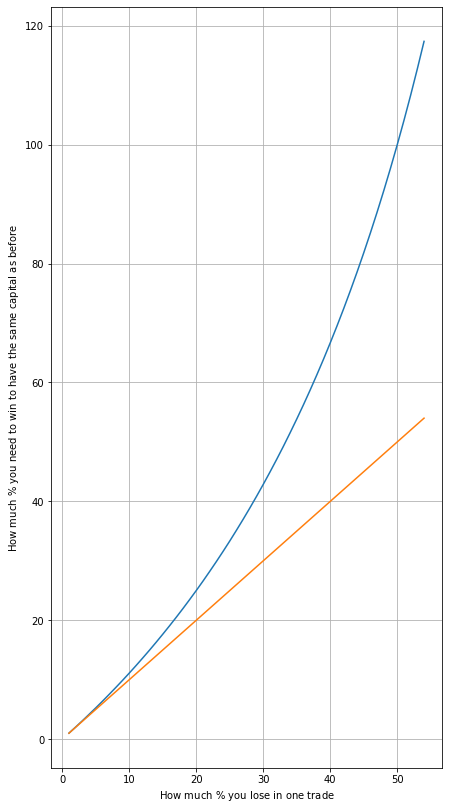

In [13]:
loss = np.arange(1, 55)
recovery = loss_rec(loss)
fig, ax = plt.subplots(figsize = (7, 14))
ax.plot(loss, recovery)
ax.plot(loss, loss)
ax.grid()
ax.set_xlabel('How much $\%$ you lose in one trade')
ax.set_ylabel('How much $\%$ you need to win to have the same capital as before')
plt.show()

# <font face="gotham" color="purple"> Money Management </font>

The key of risk management is to ask

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<h3>Q: How much percentage of your capital you are will to risk (loss) in each trade?</h3>
    <h3>A: A Rule of Thumb is less than 2% for each trade.</h3>
</div> 

Here are steps to calculate your position size, you can deviate it only when you are consciously aware of the risk.
1. Set $2\%$ as maximum per trade loss.
2. Calculate $L_{max}=2\%\times M$ to get max loss $L_{max}$ in monetary unit, where $M$ represents total capital
3. Decide your entry price, denote as $a$.
4. Decide your stop loss price, denote as $b$.
5. Calculate position size with follow formula, where $p_v$ is the pair's pip value
$$
s = \frac{L_{max}}{(|a-b|)p_v}
$$

Suppose your account has $\$47394$ , then max loss per trade is

In [14]:
L_max = 0.02*47394; L_max

947.88

You are shorting $\text{EUR/USD}$ at $1.1890$, stop loss at $1.1930$, total pips loss are

In [15]:
int(abs(1.1890-1.1930)*10000)

40

So max loss of every pip is

In [16]:
L_max_pip = 947.88/40; L_max_pip

23.697

Now the question is how many lots should you trade in order to gain/lose $\$23.697$ per pip. Every pip of $\text{EUR/USD}$ is $10$ dollars, therefore

In [17]:
L_max_pip/10

2.3697

So you should set you position at $2.3697$ lots. Here is a function to summarize calculations above

In [18]:
def pos_sizing(M, risk_ratio, sl_pips, pip_val):
    """Posistion sizing"""
    L_max = M * risk_ratio
    L_max_pip = L_max/sl_pips
    return np.round(L_max_pip/pip_val, 2)

In [19]:
pos_sizing(M=1600, risk_ratio = .02, sl_pips = 300, pip_val = 1.6)

0.07

## <font face="gotham" color="purple"> Example 1</font>

Let's use function to calculate one more example. 

You plan to long $\text{AUDNZD}$ at price $1.0323$, stop loss at $1.0160$. Your capital is $\$12902$, risk ratio is $1.5\%$, sport $\text{NZDUSD}$ is $0.68542$.

Calculate the amount of pips on stop-loss.

In [20]:
entry = 1.0323
stop_loss = 1.0160
sl_pips = np.round(abs(entry - stop_loss)*10000,3)
sl_pips

163.0

In [21]:
pip_val = 10*.68542

In [22]:
pos_sizing(M=15482, risk_ratio = .015, sl_pips = sl_pips, pip_val = pip_val)

0.21

## <font face="gotham" color="purple"> Example 2</font>

You plan to long $\text{CADJPY}$ with a stop loss of $50$ pips. Your capital is $364535$ swissy francs, risk ratio is $2\%$, current $CHFJPY$ is $117.93400$.

In [23]:
pip_val = 1000/117.934
pos_sizing(M=364535, risk_ratio = .02, sl_pips = 45, pip_val = pip_val)

19.11

You can also calculate pip value in myfxbook's <a href = 'https://www.myfxbook.com/forex-calculators/position-size'>position size calculator</a>.

If you prefer to calculate by yourself, make sure the pip value is correctly computed.

# <font face="gotham" color="purple"> Margin </font>

The **margin** is the amount of equity that you pledges whenever an order is executed. 

$$
m = \frac{100000}{\text{leverage}}\times\text{lots} \times E_{B/D}
$$

where $E_{B/D}$ is executed price of base to deposit currency, $\text{lots}$ is lot size. The formula itself is self-explanatory. You can see your **leverage** in your account specifics, if in EU, most probably will be $30$, which means you will leverage $30$ times of your own capital.

Intuitively, your margin (unit of base currency) for a standard contract is $100000/\text{leverage}$, multiply by the lots is the total amount of margin you pledge (unit of base currency). But it usually needs to be converted into your deposit currency, in this case we use $\text{USD}$.

In [35]:
def margin(base2depo, lot, lev):
    return 10e4/lev*base2depo*lot
def fr_margin(cap, margin):
    return cap - margin

If you buy $\text{EURUSD}$ at a price of $1.8374$ with lot size of $0.5$ and your leverage is $30$, here is your margin

In [41]:
margin(1.8374, .1, 30)

612.4666666666667

In [37]:
fr_margin(1580, margin(1.17304, .04, 30))

1423.5946666666666

# <font face="gotham" color="purple"> Batting Average and Win/Loss Ratio </font>

In industry, it measures how many days a portfolio manager outperforms the reference index within a given period of time. In trading, it is simply the winning rate, i.e. the number of profitable trades over total number of trades.

Here's an example how the batting average and win/loss ratio calculated.

In [53]:
trade_history = np.array([80, -100, 260, 10, -160, 100, 120, 150, -90, -30, 180, -100])

In [54]:
win_trd = len(trade_history[trade_history>0])
loss_trd = len(trade_history[trade_history<0])
tot_trd = len(trade_history)

In [55]:
print('Batting average is {:.2}.'.format(win_trd/tot_trd))

Batting average is 0.58.


In [56]:
ave_profit = np.sum(trade_history[trade_history>0])/win_trd
ave_loss = np.sum(trade_history[trade_history>0])/loss_trd

In [59]:
print('Average winning is {}'.format(ave_profit))
print('Average loss is {}'.format(ave_loss))
print('Winning loss ratio is {}'.format(ave_profit/ave_loss))

Average winning is 128.57142857142858
Average loss is 180.0
Winning loss ratio is 0.7142857142857143
